## 4. Report Generation

The final phase of SDMT involves aggregating evidence, validating the metrics reflected by the evidence we collected, and displaying this information in a report.

#### Initialize MLTE Context

MLTE contains a global context that manages the currently active _session_. Initializing the context tells MLTE how to store all of the artifacts that it produces.

In [2]:
import os

from mlte.session import set_context, set_store

store_path = os.path.join(os.getcwd(), "store")

set_context("IrisClassifier", "0.0.1")
set_store(f"local://{store_path}")

Creating initial custom lists at URI: local:///Users/rbrowersinning/Documents/ResearchFolders/Continuum_LTP/GitRepos/mlte/demo/simple/store
Loaded 8 qa_categories for initial list
Loaded 14 quality_attributes for initial list


### Validate `Evidence` and get an updated `TestResults` with `Result`s

Now that we have our `TestSuite` ready and we have enough evidence, we create a `TestSuiteValidator` with our TestSuite, and add all the `Evidence`s we have. With that we can validate our test cases and generate an output `TestResults`, with the validation results.

In [3]:
from mlte.validation.test_suite_validator import TestSuiteValidator

# Load validator for default TestSuite id
test_suite_validator = TestSuiteValidator()

# Load all Evidence and validate TestCases
test_results = test_suite_validator.load_and_validate()

# We want to see the validation results in the Notebook, regardless of them being saved.
test_results.print_results()

# TestResults also supports persistence
test_results.save(force=True)

 > Test Case: accuracy, result: Success, details: Real magnitude is greater than or equal to threshold 0.98 - values: ["1.0"]
 > Test Case: confusion matrix, result: Success, details: Misclass count is less than threshold 2 - values: ["[[10  0  0],  [ 0 13  0],  [ 0  0  7]]"]
 > Test Case: class distribution, result: Info, details: Visual inspection is required to confirm that distribution is above 1.2%.
 > Test Case: model size, result: Success, details: Real magnitude is less than threshold 3.0 megabyte - values: ["2.471 kilobyte"]
 > Test Case: training memory, result: Failure, details: Average consumption exceeds threshold 60 megabyte - values: ["Average: 85.684 megabyte\nMinimum: 0.032 megabyte\nMaximum: 154.32 megabyte"]
 > Test Case: training cpu, result: Success, details: Maximum utilization below threshold 5.00 percent - values: ["Average: 1.52 percent\nMinimum: 0.00 percent\nMaximum: 3.56 percent"]


If we want to, we can review test results that could not be automatically validated and require human supervision, and decide whether they pass or not.

In [4]:
# Show the results that have been marked as informational that could not be validated.
test_results.print_results(result_type="Info")

 > Test Case: class distribution, result: Info, details: Visual inspection is required to confirm that distribution is above 1.2%.


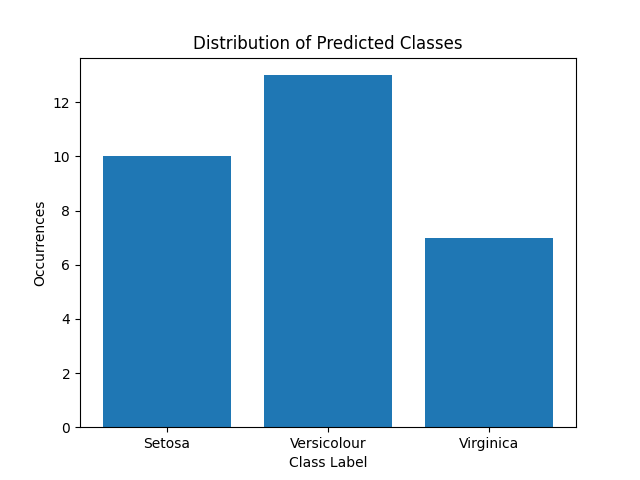

In [5]:
# Review the evidence we have for this case.
from IPython import display
from mlte.evidence.types.image import Image

case_id = "evidence.class distribution"
case_image = Image.load(case_id)
display.display(display.Image(data=case_image.image))

Assuming we decided visually that it passed the expectations, we can mark it as such.

In [6]:
from mlte.results.result import Success

test_results.convert_result(
    test_case_id="class distribution",
    result_type=Success,
    message="Visual inspection confirms distribution is above 1.2%",
)

test_results.print_results()
test_results.save(force=True)

 > Test Case: accuracy, result: Success, details: Real magnitude is greater than or equal to threshold 0.98 - values: ["1.0"]
 > Test Case: confusion matrix, result: Success, details: Misclass count is less than threshold 2 - values: ["[[10  0  0],  [ 0 13  0],  [ 0  0  7]]"]
 > Test Case: class distribution, result: Success, details: Manually validated: Visual inspection confirms distribution is above 1.2% (original message: Visual inspection is required to confirm that distribution is above 1.2%.)
 > Test Case: model size, result: Success, details: Real magnitude is less than threshold 3.0 megabyte - values: ["2.471 kilobyte"]
 > Test Case: training memory, result: Failure, details: Average consumption exceeds threshold 60 megabyte - values: ["Average: 85.684 megabyte\nMinimum: 0.032 megabyte\nMaximum: 154.32 megabyte"]
 > Test Case: training cpu, result: Success, details: Maximum utilization below threshold 5.00 percent - values: ["Average: 1.52 percent\nMinimum: 0.00 percent\nMaxim

#### Generate a Report

The final step of SDMT involves the generation of a report to communicate the results of model evaluation.

In [7]:
from mlte.report.artifact import (
    Report,
    CommentDescriptor,
)

# Create a report with the default NegotiationCard, TestSuite and TestResults in this store.
report = Report(
    comments=[
        CommentDescriptor(
            content="This model should not be used for nefarious purposes."
        )
    ],
)

report.save(force=True, parents=True)